<a href="https://colab.research.google.com/github/bala-guhan/ML_Pojects/blob/main/Sarcasm_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SARCASM DETECTOR**

# Getting the datasets

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2023-08-24 16:17:38--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 74.125.139.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2023-08-24 16:17:39 (86.2 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [2]:
import json

In [3]:
with open("/tmp/sarcasm.json",'r') as f:
  datastore = json.load(f)

  sentences = []
  labels = []
  urls = []

  for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

# Setting the parameters

In [4]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


# Tokenizing and embedding

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(training_sequences)

[[328, 1, 799, 3405, 2404, 47, 389, 2214, 1, 6, 2614, 8863], [4, 6840, 3096, 3097, 23, 2, 161, 1, 390, 2842, 6, 251, 9, 889], [153, 890, 2, 891, 1445, 2215, 595, 5650, 221, 133, 36, 45, 2, 8864], [1252, 38, 213, 382, 2, 1572, 29, 288, 23, 10, 2405, 1446, 5651, 958], [715, 672, 5652, 1043, 8865, 662, 553, 5, 4, 92, 1253, 90], [8866, 4, 366, 70], [4, 6841, 369, 6, 498, 3406, 1875, 1378], [20, 563, 36, 1091, 31, 163, 2, 103, 87, 18, 150, 6, 33, 343], [278, 3407, 6842, 447, 8867, 2092, 148], [2093, 300, 335, 370, 63, 1, 6, 4, 4264], [3098, 2216, 3756, 14, 37, 5653, 8868, 5, 2094, 1092], [309, 767, 428, 8, 1663, 1664, 9, 3099], [226, 477, 2843, 13, 9, 922, 239, 371, 2, 4265, 1, 6843], [235, 5654, 8869, 3757, 39, 240, 1, 6, 7, 174], [1, 1379, 800, 663, 5, 336, 3, 959], [524, 2094, 8870, 126, 8871, 6, 8872, 3758, 1665], [2095, 1328, 341, 46, 3408, 323, 288, 960, 2, 22, 1, 19, 1044, 359, 109, 1447], [1666, 6844, 3100, 8873, 19, 5655, 1200], [8874, 822, 2, 1768, 251, 1201, 38, 211, 2406], [4820

In [9]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


# Building the model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


# Model training

In [12]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 24s - loss: 0.6744 - accuracy: 0.5646 - val_loss: 0.6256 - val_accuracy: 0.6104 - 24s/epoch - 38ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4613 - accuracy: 0.8118 - val_loss: 0.3934 - val_accuracy: 0.8286 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 4s - loss: 0.3159 - accuracy: 0.8729 - val_loss: 0.3548 - val_accuracy: 0.8487 - 4s/epoch - 6ms/step
Epoch 4/30
625/625 - 3s - loss: 0.2629 - accuracy: 0.8959 - val_loss: 0.3421 - val_accuracy: 0.8568 - 3s/epoch - 5ms/step
Epoch 5/30
625/625 - 3s - loss: 0.2275 - accuracy: 0.9116 - val_loss: 0.3425 - val_accuracy: 0.8583 - 3s/epoch - 4ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1995 - accuracy: 0.9253 - val_loss: 0.3477 - val_accuracy: 0.8544 - 2s/epoch - 4ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1786 - accuracy: 0.9323 - val_loss: 0.3579 - val_accuracy: 0.8530 - 3s/epoch - 5ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1600 - accuracy: 0.9410 - val_loss: 0.3728 - val_accuracy: 0.8535 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 

Plotting the graph to infer about the accuracy of the model

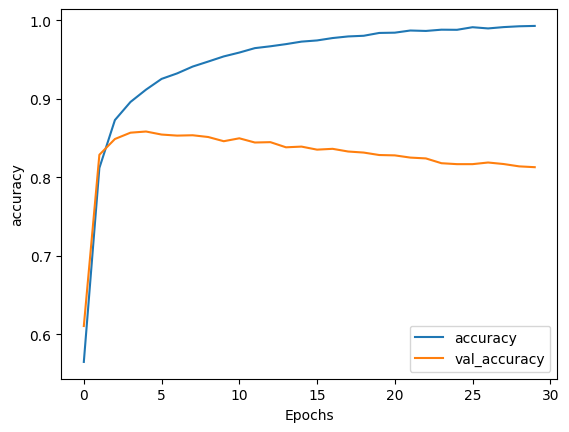

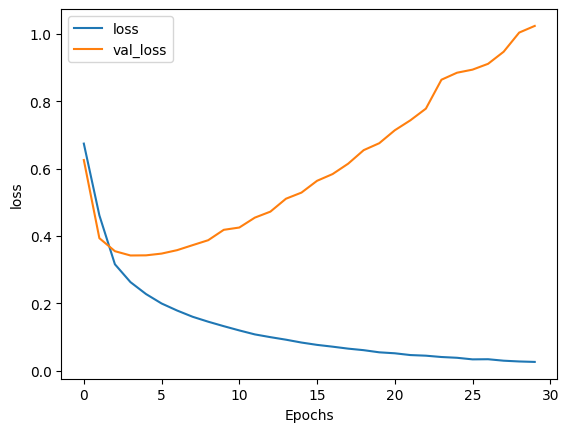

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[3])
print(labels[3])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
boehner just wants wife to listen, not come up with alternative debt-reduction ideas
1


weights and shape

In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


# Testing the model with custom input

In [16]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
result = model.predict(padded)
print(result[1])

1/1 [==============================] - 0s 76ms/step
[4.7799153e-05]


### Exporting the embedding files to get a view from the embedding emulator

In [17]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [18]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Visualizing the word embeddings of our model through Tensoflow's Embedding projector**

As we can see, the vectors have aligned according to it's sentiment and probablity

Our model works on this sentiment analysis mechanism and grades the values of each word(vector) accordingly

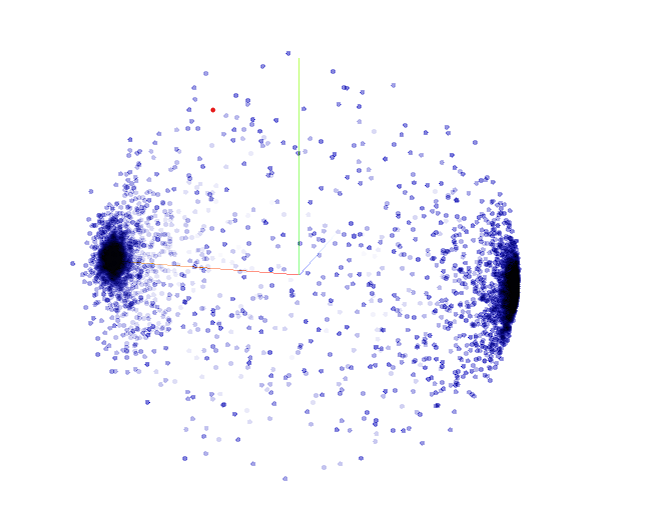

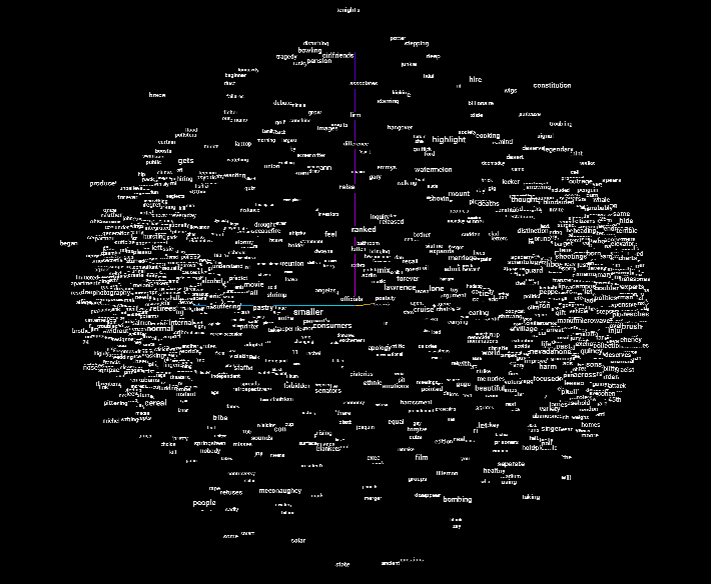